In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
%matplotlib inline
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import linregress 

In [3]:
pd.option_context('display.precision', 10)
pd.set_option('display.float_format', '{:.10f}'.format)

In [4]:
df=pd.read_csv("classified_lcs\grs1915_lc375.txt",sep="	",skiprows=[0, 1], header=None)

In [5]:
n=len(df)

In [6]:
df.columns = ['time', 'total','low','mid','high'] #time in seconds

In [7]:
df

,time,total,low,mid,high
0,120874680.0703123808,4864.0000724792,3153.6000469923,659.2000098228,888.0000000000
1,120874680.1953121424,4523.2000674009,2921.6000435352,616.0000091791,920.0000000000
2,120874680.3203119040,4966.4000740051,3273.6000487804,616.0000091791,952.0000000000
3,120874680.4453116655,4811.2000716925,2996.8000446558,721.6000107527,960.0000000000
4,120874680.5703114271,4046.4000602961,2684.8000400066,524.8000078201,896.0000000000
...,...,...,...,...,...
20090,120877191.3155225664,1169.6000174284,755.2000112534,169.6000025272,856.0000000000
20091,120877191.4405223131,988.8000147343,676.8000100851,126.4000018835,464.0000000000
20092,120877191.5655220747,1144.0000170469,744.0000110865,166.4000024796,632.0000000000
20093,120877191.6905218363,892.8000133038,600.0000089407,134.4000020027,344.0000000000


In [8]:
df["total"] - (df["low"] + df["mid"])

0       1051.2000156641
1        985.6000146866
2       1076.8000160456
3       1092.8000162840
4        836.8000124693
              ...      
20090    244.8000036478
20091    185.6000027657
20092    233.6000034809
20093    158.4000023603
20094    222.4000033140
Length: 20095, dtype: float64

In [9]:
#time step is 0.125 sec

In [10]:
low=np.array(list(df["low"]))
mid=np.array(list(df["mid"]))
high=np.array(list(df["high"]))

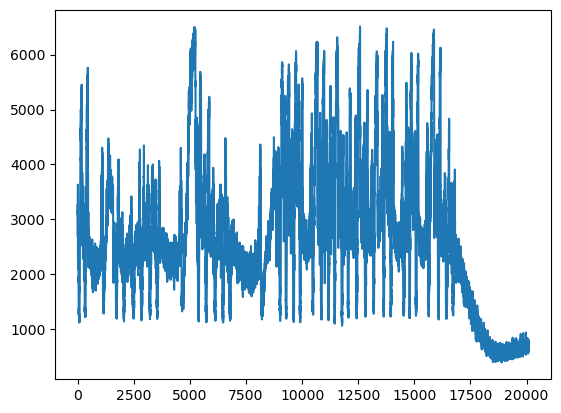

In [11]:
plt.plot(range(len(low)),low)
plt.show()

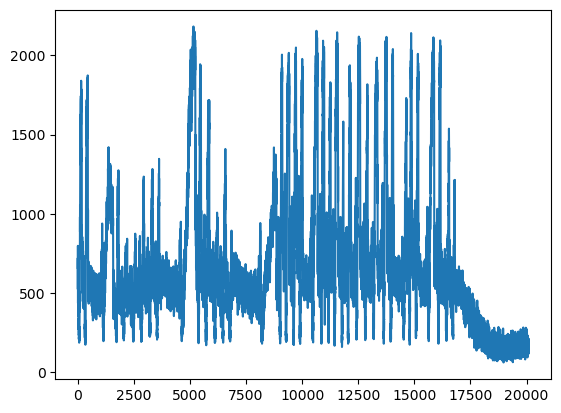

In [12]:
plt.plot(range(len(mid)),mid)
plt.show()

Null Hypothesis: a and b are compatible <br/>
    1) Get the distribution of (a-b)/sqrt(2*N)
         <pre>( since N isnt given,we use the estimator N=(a+b)/2 )</pre>
    2) Expect a normal gaussian,check summary statistic: average and sigma<br/>
    3) do same for all files,get histogram for all Lc_i<br/>
    4) make a simulation and check the expected vs the obsered

In [13]:
np.std(low)

1320.6669180123383

In [14]:
np.std(mid)

447.1060125678315

In [15]:
np.mean(low)

2654.738750680859

In [16]:
np.mean(mid)

671.822134917623

In [17]:
x=(low[4000:]-mid[4000:])/np.sqrt(low[4000:]+mid[4000:])

In [18]:
np.std(x)

9.031447193246974

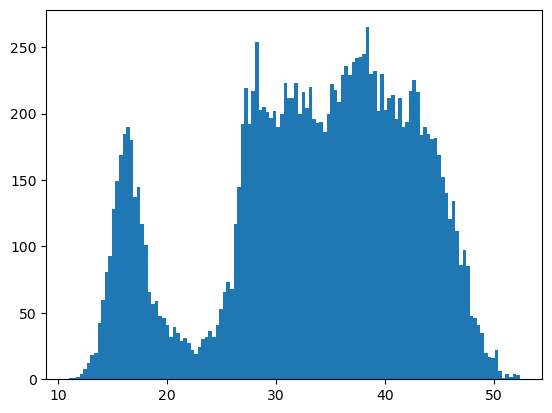

In [19]:
plt.hist(x,int(np.sqrt(len(x))))
plt.show()

In [21]:
total=0
for i in range(len(x)):
    if(x[i]>0):
        total+=1
print(total)
print(total/n)

16095
0.800945508833043


20095


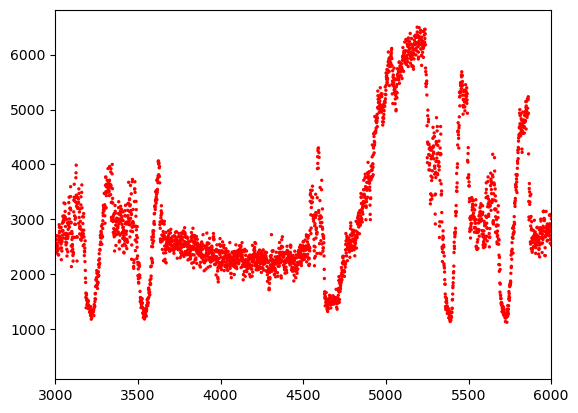

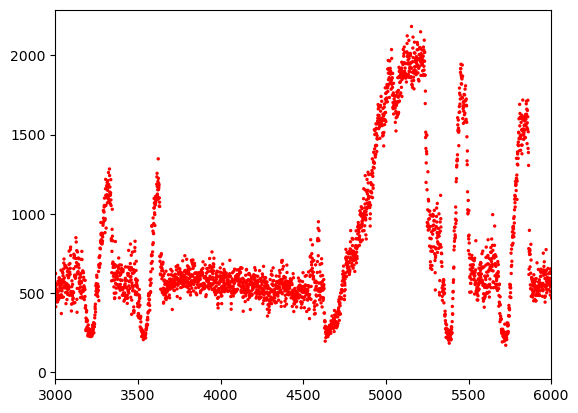

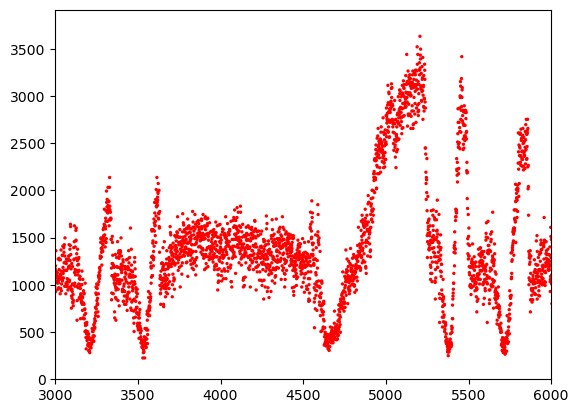

In [22]:
color=[]
list_=[]
r=0
for i in range(len(low)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)


print(r)
plt.scatter(range(len(low)),low,c=color,s=2)

#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(3000,6000)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()
#plt.clear()
plt.scatter(range(len(low)),mid,c=color,s=2)
plt.xlim(3000,6000)
plt.show()
#
plt.scatter(range(len(high)),high,c=color,s=2)
plt.xlim(3000,6000)
plt.show()

20095


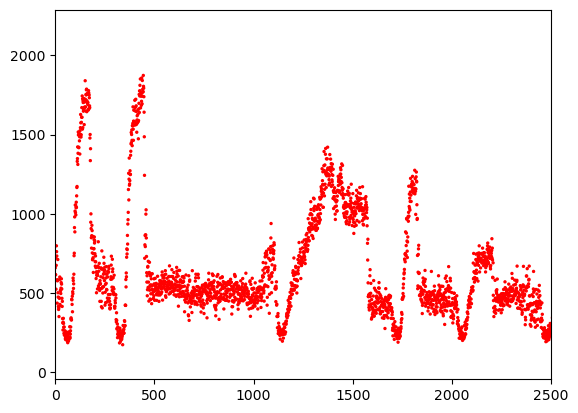

In [23]:
color=[]
list_=[]
r=0
for i in range(len(mid)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)
        
print(r)
plt.scatter(range(len(low)),mid,c=color,s=2)
#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(0,2500)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()

In [24]:
len(low)

20095